In [153]:
#Importation des librairies
import os
import yake
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kilia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "que", "voici", "parmi", "chaque", "leurs",
       "lequel", "alors", "laquelle", "trop", "fin", "tant", "ceux", "rien", "grandes",
       "tÃ©l", "dem", "trÃ¨s", "app", "part", "ans","cuis","tÃ©lÃ©ph","sociÃ©tÃ©", "rem","rue", 
       "gar", "grand", "ecrire", "place","monsieur", "quelques", "midi", "brux", "ecrire", "une", "sociÃ©tÃ©",
       "tél", "ecr", "téléph","vitae", "etc", "bur", "réf", "terr","très", "prés", "déjà", "pers",
       "effet", "fem","également", "mén", "vers", "toute", "trav","dès", "porte", "vis", "toujours",
       "démi", "bel", "celui", "jour", "chez", "mod", "samedi", "madame", "liv","tel", "bonne",
       "bon", "mois", "temps", "dimanche","saint", "bonnes", "peu", "près", "villa", "engage", "soir", "libre",
       "cherche", "vendre", "car", "demande", "etat","décès", "partie", "matin", "eau", "reprise","rossel", "premier",
       "première","maison", "jours","avant","cependant", "vue", "but","grande", "adresser", "dame"]
sw = set(sw)

In [178]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [183]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [184]:
# Imprimer le nombre de fichiers identifiés
len(files)

7936

In [185]:
#Choisir une année
year = 1970

In [186]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1970-01-03_01-00002.txt',
 'KB_JB838_1970-01-06_01-00004.txt',
 'KB_JB838_1970-01-07_01-00020.txt',
 'KB_JB838_1970-01-09_01-00010.txt',
 'KB_JB838_1970-01-10_01-00029.txt',
 'KB_JB838_1970-01-18_01-00013.txt',
 'KB_JB838_1970-01-21_01-00011.txt',
 'KB_JB838_1970-01-22_01-00032.txt',
 'KB_JB838_1970-01-25_01-00014.txt',
 'KB_JB838_1970-02-04_01-00006.txt',
 'KB_JB838_1970-02-11_01-00015.txt',
 'KB_JB838_1970-02-13_01-00026.txt',
 'KB_JB838_1970-02-14_01-00006.txt',
 'KB_JB838_1970-02-14_01-00022.txt',
 'KB_JB838_1970-02-15_01-00016.txt',
 'KB_JB838_1970-02-19_01-00011.txt',
 'KB_JB838_1970-02-20_01-00007.txt',
 'KB_JB838_1970-02-26_01-00022.txt',
 'KB_JB838_1970-03-04_01-00015.txt',
 'KB_JB838_1970-03-10_01-00024.txt',
 'KB_JB838_1970-03-15_01-00011.txt',
 'KB_JB838_1970-03-19_01-00015.txt',
 'KB_JB838_1970-03-22_01-00002.txt',
 'KB_JB838_1970-03-22_01-00029.txt',
 'KB_JB838_1970-03-27_01-00018.txt',
 'KB_JB838_1970-03-28_01-00027.txt',
 'KB_JB838_1970-06-02_01-00032.txt',
 

In [187]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding= 'utf-8') as f:
        content_list.append(f.read())

In [188]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [164]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"fC 2'! mam LE SOIR SAMEDI 3 JANVIER 1970 LA VIE POLITIQUE ET SOCIALE rapport de l'Association belge des Banques AU SECTEUR PUBLIC Une évolution sympathique : les Belges se familiarisent de plus en plu"

In [189]:
# Les dix premiers fichiers
files[:10]

['KB_JB838_1887-12-22_01-00001.txt',
 'KB_JB838_1887-12-22_01-00002.txt',
 'KB_JB838_1887-12-22_01-00003.txt',
 'KB_JB838_1887-12-22_01-00004.txt',
 'KB_JB838_1887-12-22_01-00005.txt',
 'KB_JB838_1887-12-22_01-00006.txt',
 'KB_JB838_1887-12-23_01-00001.txt',
 'KB_JB838_1887-12-23_01-00002.txt',
 'KB_JB838_1887-12-24_01-00001.txt',
 'KB_JB838_1887-12-24_01-00002.txt']

In [192]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [193]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:600]

"fC 2'! mam LE SOIR SAMEDI 3 JANVIER 1970 LA VIE POLITIQUE ET SOCIALE rapport de l'Association belge des Banques AU SECTEUR PUBLIC Une évolution sympathique : les Belges se familiarisent de plus en plus avec l'usage du chèque Parmi l'ensemble de. renseigne- meqts intéressants qui figurent dans lé nouveau rapport annuel de l’Association belge des Banques, il y a un graphique concernant la proportion; des creances des banques sur le secteur public par rapport au total de leurs créances sur le secteur public et privé. Voici le pourcentage'qu’on nous présenté : Importance relative des créances des "

In [143]:
# Récupérer le texte du fichier
text = open(os.path.join(temp_path, f'1970.txt'), 'r', encoding='utf-8').read()
text[:500]

"fC 2'! mam LE SOIR SAMEDI 3 JANVIER 1970 LA VIE POLITIQUE ET SOCIALE rapport de l'Association belge des Banques AU SECTEUR PUBLIC Une évolution sympathique : les Belges se familiarisent de plus en plus avec l'usage du chèque Parmi l'ensemble de. renseigne- meqts intéressants qui figurent dans lé nouveau rapport annuel de l’Association belge des Banques, il y a un graphique concernant la proportion; des creances des banques sur le secteur public par rapport au total de leurs créances sur le secte"

In [194]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('Tél', 1.2135452281259961e-05),
 ('Ecrire Agence Rossel', 1.2629070205564168e-05),
 ('Bruxelles', 1.3563499891720683e-05),
 ('Bruxelles Tél', 2.637994721419176e-05),
 ('rue', 3.909161110614385e-05),
 ('Mais', 4.3706725997189874e-05),
 ('Agence Rossel', 5.8550137843998585e-05),
 ('Van', 6.101106241850021e-05),
 ('ROSSEL', 6.772208865198976e-05),
 ('dem', 8.973398283183293e-05),
 ('ans', 9.895522041352388e-05),
 ('l’Agence Rossel', 0.0001050571786221483),
 ('prix', 0.00010924498715431647),
 ('rue Van', 0.00012589276721325176),
 ('Brux', 0.00012640814464453905),
 ('BRUXELLES demande', 0.00012779191546633944),
 ('BRUXELLES PARIS', 0.00014665133659264365),
 ('Rue Jean Van', 0.00015868413692730391),
 ('rue Royale', 0.00016209529221259715),
 ('SOIR', 0.0001719973895386662),
 ('BRUXELLES engage', 0.00018699594997859088),
 ('rue Pierre Van', 0.00018827027701548012),
 ('Ecrire', 0.0001936214528292695),
 ('faire part', 0.0001996423504053965),
 ('VAN DEN BERGHE', 0.00020289610382279342),
 ('Belg

In [195]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Bruxelles Tél',
 'Agence Rossel',
 'l’Agence Rossel',
 'rue Van',
 'BRUXELLES demande',
 'BRUXELLES PARIS',
 'rue Royale',
 'BRUXELLES engage',
 'faire part',
 'Votes valabL',
 'Bruxelles centre',
 'Ecrire Agence',
 'BRUXELLES dem',
 'van den']

In [196]:
#Créer une fonction de nettoyage adaptée
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [197]:
#Appliquer la fonction au fichier complet de cette année
clean_text(year, folder = temp_path)

'Output has been written in ../data/tmp/1970_clean.txt!'

In [198]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding= 'utf-8') as f:
    after = f.read()

after[:500]

'mam janvier vie politique sociale rapport association belge banques secteur public évolution sympathique belges familiarisent usage chèque ensemble renseigne meqts intéressants figurent nouveau rapport annuel association belge banques graphique concernant proportion creances banques secteur public rapport total créances secteur public privé pourcentage présenté importance relative créances banques secteur publie mars belgique pays bas italie allemagne france date indiquée effets fonds publiés co'

In [199]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('bruxelles', 1181), ('prix', 462), ('heures', 411), ('service', 324), ('agence', 320), ('cours', 267), ('avenue', 266), ('belge', 252), ('belgique', 248), ('pays', 235)]


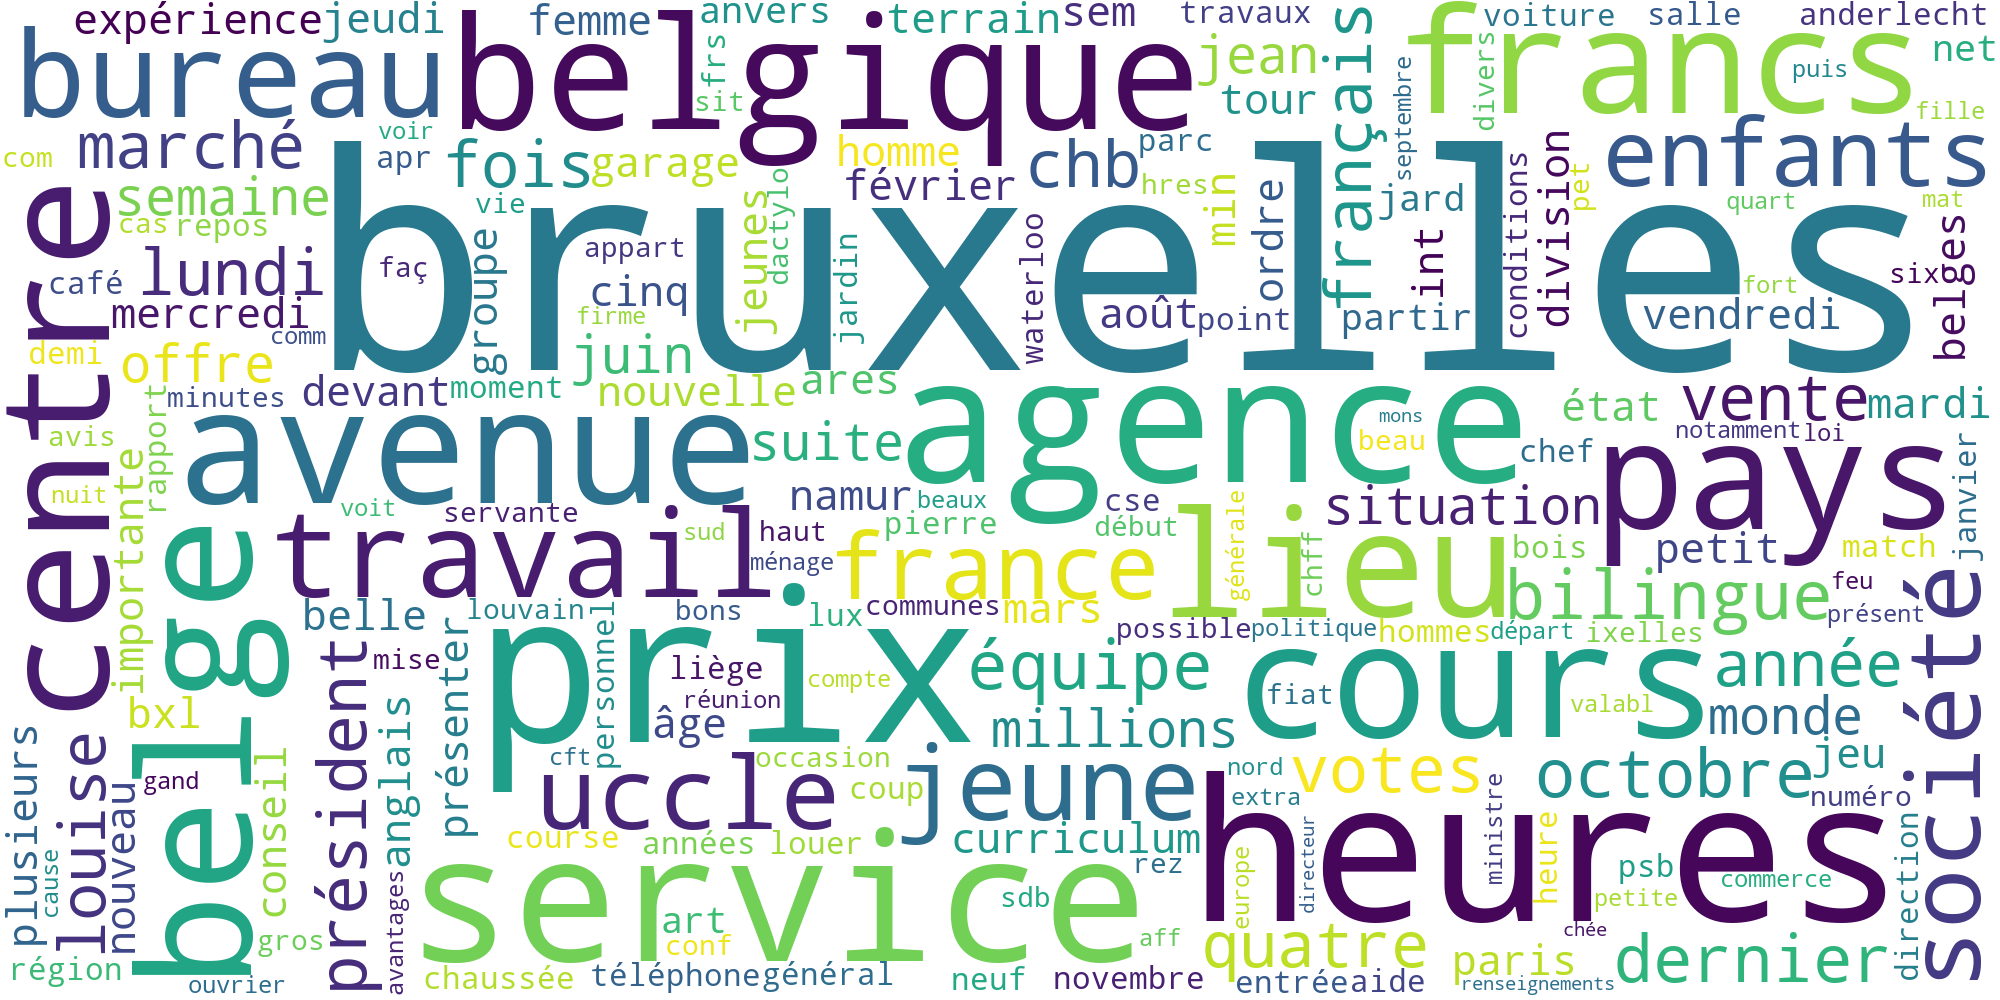

In [200]:
#Créer, afficher et stocker le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

In [5]:
# Reconnaissance d'entités nommées

#importation des libraires
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [8]:
nlp = spacy.load('fr_core_news_md')

In [6]:
# Charger le texte
n=900000
text = open("../data/all.txt", encoding='utf-8').read()[:n]

In [9]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 1min
Wall time: 1min 23s


In [37]:
# Compter les entités de personnes
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [38]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Thérèse apparait 25 fois dans le corpus
Guilbert apparait 18 fois dans le corpus
M. Wilson apparait 17 fois dans le corpus
Enguerrand apparait 14 fois dans le corpus
Molière apparait 13 fois dans le corpus
Octave apparait 13 fois dans le corpus
Agence Rossel apparait 13 fois dans le corpus
Monsieur apparait 12 fois dans le corpus
Wilson apparait 11 fois dans le corpus
Gioconda apparait 11 fois dans le corpus
duc d’Aumale apparait 11 fois dans le corpus
Parentis apparait 10 fois dans le corpus
Henri apparait 9 fois dans le corpus
Jules Ferry apparait 9 fois dans le corpus
Grippe-Soleil apparait 9 fois dans le corpus
Lundi apparait 8 fois dans le corpus
Sapho apparait 8 fois dans le corpus
Reine apparait 8 fois dans le corpus
Aubertin apparait 7 fois dans le corpus
Roux apparait 7 fois dans le corpus
Monseigneur apparait 7 fois dans le corpus
Edwige apparait 7 fois dans le corpus
Pollet apparait 7 fois dans le corpus
M. Finet apparait 6 fois dans le corpus
M. Vigneau apparait 6 fois dans

In [127]:
# Compter les entités d'organisations
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

In [128]:
# Trier et imprimer

sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for organisation, freq in sorted_organisation[:60]:
    print(f"{organisation} apparait {freq} fois dans le corpus")

Chambre apparait 12 fois dans le corpus
Cirque Royal apparait 8 fois dans le corpus
Sénat apparait 7 fois dans le corpus
Cour apparait 7 fois dans le corpus
Times apparait 6 fois dans le corpus
Cockerill apparait 5 fois dans le corpus
Total apparait 5 fois dans le corpus
SCHAERBEEK Bières apparait 5 fois dans le corpus
Société Royale de Philanthropie apparait 5 fois dans le corpus
Crédit apparait 4 fois dans le corpus
Agence apparait 4 fois dans le corpus
Constitution apparait 4 fois dans le corpus
Banque de Belgique apparait 4 fois dans le corpus
Ambassadeurs apparait 4 fois dans le corpus
Conservatoire apparait 4 fois dans le corpus
Ale.322 apparait 4 fois dans le corpus
Standard apparait 4 fois dans le corpus
Parts apparait 4 fois dans le corpus
Agence Rossel apparait 4 fois dans le corpus
Conseil apparait 3 fois dans le corpus
Cercle symphonique et dramatique apparait 3 fois dans le corpus
Aciéries apparait 3 fois dans le corpus
Notaire dem apparait 3 fois dans le corpus
Tapis appa

In [122]:
# Compter les entités de lieux
location = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location[ent.text] += 1

In [123]:
# Trier et imprimer

sorted_location = sorted(location.items(), key=lambda kv: kv[1], reverse=True)

for location, freq in sorted_location[:50]:
    print(f"{location} apparait {freq} fois dans le corpus")

Bruxelles apparait 145 fois dans le corpus
Paris apparait 108 fois dans le corpus
Belgique apparait 48 fois dans le corpus
Anvers apparait 42 fois dans le corpus
Nord apparait 36 fois dans le corpus
Gand apparait 35 fois dans le corpus
rue de la Madeleine apparait 32 fois dans le corpus
Bourse apparait 28 fois dans le corpus
Liège apparait 28 fois dans le corpus
Russie apparait 28 fois dans le corpus
Londres apparait 27 fois dans le corpus
France apparait 20 fois dans le corpus
Flandre apparait 19 fois dans le corpus
Flénu apparait 19 fois dans le corpus
Vienne apparait 17 fois dans le corpus
SOIR apparait 17 fois dans le corpus
Baroda apparait 17 fois dans le corpus
Autriche apparait 15 fois dans le corpus
Brux apparait 15 fois dans le corpus
Rome apparait 15 fois dans le corpus
Allemagne apparait 15 fois dans le corpus
Ixelles apparait 14 fois dans le corpus
Etat apparait 13 fois dans le corpus
rue Royale apparait 13 fois dans le corpus
Mons apparait 13 fois dans le corpus
Durand app

In [ ]:
#Analyse de sentiments

In [43]:
#importation de librairies
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [44]:
#Fonction
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [37]:
# Obtenir une liste contenant les phrases
f = open(os.path.join(temp_path, "1970.txt"), 'r', encoding='utf-8')
contenu = f.read()
f.close()
# Le caractère discriminant est . dans ce cas
liste_phrases = contenu.split('.')


In [38]:
len(liste_phrases)

88792

In [39]:
liste_phrases[40]

' l’instauration d’un coefficient orientant d’une manière aussi rigide l’affectation des ressources bancaires, d’autant plus qu’un très important volume d’effets -et de fonds publics se trouve dans le portefeuille des banques'

In [134]:
get_sentiment("l’instauration d’un coefficient orientant d’une manière aussi rigide l’affectation des ressources bancaires, d’autant plus qu’un très important volume d’effets -et de fonds publics se trouve dans le portefeuille des banques")

This text is 21% positive and 0.275% subjective.


In [48]:
liste_phrases[94]

' L’Université libre de Bruxelles telle qu’elle existe maintenant — ce sont les termes de l’exposé des motifs — sera mise en liquidation dès l’entrée en vigueur de la loi'

In [49]:
get_sentiment("L’Université libre de Bruxelles telle qu’elle existe maintenant — ce sont les termes de l’exposé des motifs — sera mise en liquidation dès l’entrée en vigueur de la loi")

This text is 45% positive and 0.3% subjective.


In [50]:
liste_phrases[7005]

' Voilà que cette journée dont on attendait beaucoup a tourné à presque rien'

In [51]:
get_sentiment("Voilà que cette journée dont on attendait beaucoup a tourné à presque rien")

This text is 10% positive and 0.1% subjective.


In [52]:
liste_phrases[701]

' François Borgers, facteur des posetes, à Drieslinter, a été renversé par un autobus de la ligne Tirle- mont - Diest'

In [53]:
get_sentiment(" François Borgers, facteur des posetes, à Drieslinter, a été renversé par un autobus de la ligne Tirle- mont - Diest")

This text is neutral and perfectly objective.


In [54]:
liste_phrases[6]

' Ce coefficient vise notamment à soutenir la politique d’encadrement des crédits bancaires, appliquée par la Banque Nationale, en empêchant que lés banques ne se procurent des liquidités par la réduction du volume des effets et fonds publics qu’elles ont eh portefeuille'

In [138]:
get_sentiment("Ce coefficient vise notamment à soutenir la politique d’encadrement des crédits bancaires, appliquée par la Banque Nationale, en empêchant que lés banques ne se procurent des liquidités par la réduction du volume des effets et fonds publics qu’elles ont eh portefeuille'")

This text is 6% positive and 0.1125% subjective.


In [55]:
liste_phrases[70]

' Le budget de la Santé publique Les services du Sénat viennent de distribuer le texte du budget du ministère de la Santé publique et de la Famille pour l’année budgétaire 1970'

In [56]:
get_sentiment("Le budget de la Santé publique Les services du Sénat viennent de distribuer le texte du budget du ministère de la Santé publique et de la Famille pour l’année budgétaire 1970")

This text is neutral and perfectly objective.


In [57]:
liste_phrases[125]

" Quant au gouvernement, il est remplacé par un conseil d'Etat, dans lequel on trouvera ministres et secrétaires d’Etat"

In [58]:
get_sentiment("Quant au gouvernement, il est remplacé par un conseil d'Etat, dans lequel on trouvera ministres et secrétaires d’Etat")

This text is neutral and perfectly objective.


In [103]:
liste_phrases[230]

' C’est dans cette optique qu’il faut considérer l’octroi, à côté des incitants classiques, d’une prime par emploi créé'

In [59]:
get_sentiment("C’est dans cette optique qu’il faut considérer l’octroi, à côté des incitants classiques, d’une prime par emploi créé")

This text is 70% positive and 0.2% subjective.


In [117]:
liste_phrases[101]

' Il est prévu, entre autres que les centres de recherches existants pourront être maintenus'

In [60]:
get_sentiment(" Il est prévu, entre autres que les centres de recherches existants pourront être maintenus")

This text is 9% positive and 0.2333333333333333% subjective.


In [61]:
liste_phrases[97]

" Quant à l’Université de Louvain — « Katolieke Universiteit, te Leu- ven », — elle connaîtra un sort sensiblement identique, avec la différence cependant que l'établissement existant actuellement ne disparaîtra pas"

In [62]:
get_sentiment("Quant à l’Université de Louvain — « Katolieke Universiteit, te Leu- ven », — elle connaîtra un sort sensiblement identique, avec la différence cependant que l'établissement existant actuellement ne disparaîtra pas")

This text is 4% positive and 0.1% subjective.
